In [1]:
from dotenv import dotenv_values
from backtester import Backtest
import pandas as pd
import numpy as np
from strategy import MlDt, StatisticalTest, StrategiesSignals
from binance.client import Client
import datetime
from dataset import Dataset

# Download data

In [2]:
data_binance = Dataset()
data = data_binance.get_data(days=90, ticker='SFPUSDT', ts='1H')

# Initialization strategy

In [3]:

strategy_ml = MlDt(threshold=0.003)


## Create Rules for Mean Reversing strategy

In [6]:
strategy_ml._save_rules(
    data=data,
    rules=50,
    reverse=False
)

Rules:  1
Backtest result:  0.48880991151162556
Rules:  2
Backtest result:  0.6824378767308306
Rules:  3
Backtest result:  0.8943627629442131
Rules:  4
Backtest result:  -0.18307808206827914
Rules:  5
Backtest result:  0.6298084770014994
Rules:  6
Backtest result:  0.686642012975075
Rules:  7
Backtest result:  0.3174950164462451
Rules:  8
Backtest result:  0.05752441764319105
Rules:  9
Backtest result:  0.37543089949728115
Rules:  10
Backtest result:  0.2875755423463737
Rules:  11
Backtest result:  0.1870646347022017
Rules:  12
Backtest result:  -0.05405604212380022
Rules:  13
Backtest result:  -0.1326303282802238
Rules:  14
Backtest result:  0.03205504286320793
Rules:  15
Backtest result:  0.5689626533901514
Rules:  16
Backtest result:  -0.019852882366731217
Rules:  17
Backtest result:  0.19731234724772184
Rules:  18
Backtest result:  -0.21726218318266988
Rules:  19
Backtest result:  0.10252622817876056
Rules:  20
Backtest result:  -0.08391931476336267
Rules:  21
Backtest result:  0.1

2021-05-02 15:37:33.886 | INFO     | strategy:backtest:481 - Backtest using take profit method


<AxesSubplot:xlabel='time'>

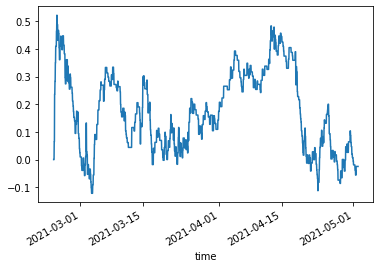

In [15]:
backtest_data = strategy_ml.backtest(data=data, comission=0.001,  takeProfit=0.03,
                lag=12, stopLoss=-0.01, exitPosition="take", ml=False)
backtest_data['cumsum'].plot()
# Statistical test
# st_test = StatisticalTest.t_test(backtest_data[backtest_data['signal']>0]['return'].values, backtest_data['close'].values)
# if st_test:
#     print('You can trade this strategy')
# if not st_test:
#     print('You can not trade this strategy')

In [8]:
backtest_data.loc[:, 'count_return'] = np.where(backtest_data['return'] > 0, 1, backtest_data['return'])
backtest_data.loc[:, 'count_return'] = np.where(backtest_data['return'] < 0, -1, backtest_data['count_return'])
print(backtest_data.loc[backtest_data['count_return'] !=0, 'count_return'].value_counts(normalize=True))
print(backtest_data[backtest_data['return'] != 0]['signal'].value_counts(normalize=True))

 1.0    0.576159
-1.0    0.423841
Name: count_return, dtype: float64
-1    0.523179
 1    0.476821
Name: signal, dtype: float64


## Create Machine learning model

2021-05-02 16:10:47.912 | INFO     | strategy:backtest:511 - Backtest using take profit method


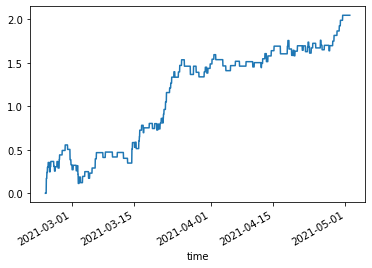

In [4]:
strategy_ml.create_machine_learning_models(data=data, split_train=1)

## Backtest

2021-05-02 15:27:47.615 | INFO     | strategy:backtest:481 - Backtest using take profit method
You can not trade this strategy


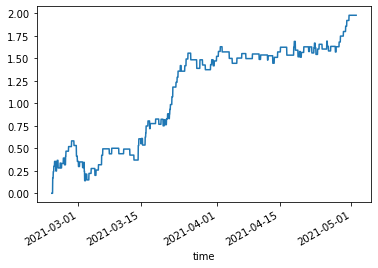

In [11]:
backtest_data = strategy_ml.backtest(data=data, comission=0.001,  takeProfit=0.05,
                lag=12, stopLoss=-0.05, exitPosition="take", ml=True)
backtest_data['cumsum'].plot()
# Statistical test
st_test = StatisticalTest.t_test(backtest_data[backtest_data['signal']!=0]['return'].values, backtest_data['close'].pct_change(1))
if st_test:
    print('You can trade this strategy')
if not st_test:
    print('You can not trade this strategy')

 1.0    0.628788
-1.0    0.371212
Name: count_return, dtype: float64
 0    0.507576
 1    0.287879
-1    0.204545
Name: signal, dtype: float64


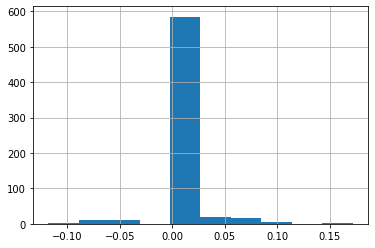

In [12]:
backtest_data[backtest_data['signal']!=0]['return'].hist()
backtest_data.loc[:, 'count_return'] = np.where(backtest_data['return'] > 0, 1, backtest_data['return'])
backtest_data.loc[:, 'count_return'] = np.where(backtest_data['return'] < 0, -1, backtest_data['count_return'])
print(backtest_data.loc[backtest_data['count_return'] !=0, 'count_return'].value_counts(normalize=True))
print(backtest_data[backtest_data['return'] != 0]['signal'].value_counts(normalize=True))

<AxesSubplot:xlabel='time'>

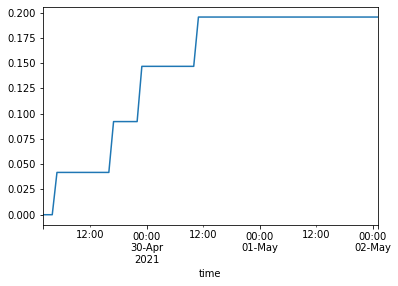

In [26]:
backtest_data.last('3D')['return'].cumsum().plot() # 1D, 1M, 1W, 5Min, 

# Test classic strategy Mean Reversing

You can not trade this strategy


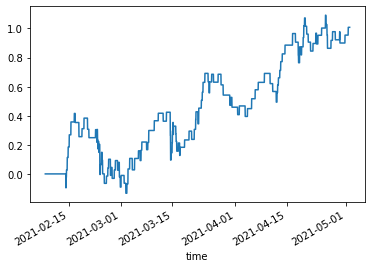

In [16]:
data = StrategiesSignals.mean_reversing(data, window=100)
back = Backtest()
backtest_data = back.exit_by_take(
    data=data,
    take_profit=0.05,
    stop_loss=-0.05,
    comission=0.001
)
backtest_data['cumsum'].plot()
# Statistical test
st_test = StatisticalTest.t_test(backtest_data[backtest_data['signal']!=0]['return'].values, backtest_data['close'].pct_change(1))
if st_test:
    print('You can trade this strategy')
if not st_test:
    print('You can not trade this strategy')

 1.0    0.590278
-1.0    0.409722
Name: count_return, dtype: float64
 1    0.409722
-1    0.388889
 0    0.201389
Name: signal, dtype: float64


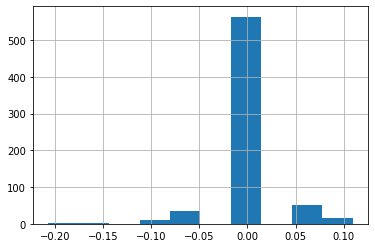

In [17]:
backtest_data[backtest_data['signal']!=0]['return'].hist()
backtest_data.loc[:, 'count_return'] = np.where(backtest_data['return'] > 0, 1, backtest_data['return'])
backtest_data.loc[:, 'count_return'] = np.where(backtest_data['return'] < 0, -1, backtest_data['count_return'])
print(backtest_data.loc[backtest_data['count_return'] !=0, 'count_return'].value_counts(normalize=True))
print(backtest_data[backtest_data['return'] != 0]['signal'].value_counts(normalize=True))

## Grange Test

In [36]:
'''
https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html
'''
from statsmodels.tsa.stattools import grangercausalitytests
features = backtest_data[['close', 'open']].pct_change().dropna()
grange_test = pd.DataFrame(grangercausalitytests(features, 10))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9430  , p=0.1635  , df_denom=1968, df_num=1
ssr based chi2 test:   chi2=1.9459  , p=0.1630  , df=1
likelihood ratio test: chi2=1.9450  , p=0.1631  , df=1
parameter F test:         F=1.9430  , p=0.1635  , df_denom=1968, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6721  , p=0.5108  , df_denom=1965, df_num=2
ssr based chi2 test:   chi2=1.3475  , p=0.5098  , df=2
likelihood ratio test: chi2=1.3471  , p=0.5099  , df=2
parameter F test:         F=0.6721  , p=0.5108  , df_denom=1965, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7937  , p=0.4973  , df_denom=1962, df_num=3
ssr based chi2 test:   chi2=2.3897  , p=0.4956  , df=3
likelihood ratio test: chi2=2.3883  , p=0.4958  , df=3
parameter F test:         F=0.7937  , p=0.4973  , df_denom=1962, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7884  , p=0.

### Testing new method before adding into strategy

In [5]:
from strategy import StrategiesSignals

In [9]:
data.loc[:, 'signal_mean_reversing'] = StrategiesSignals.mean_reversing(data, window=50)
data.loc[:, 'signal_momentun'] = StrategiesSignals.momentum(data['close'].values, seq=2)
# Check balance data. For machine learning we need balanced data
data['signal_mean_reversing'].value_counts(normalize=True)
data['signal_momentun'].value_counts(normalize=True)


### Backtesging automatic

In [5]:
take_profit_list = [0.005, 0.01, 0.02, 0.03, 0.04]
stop_loss_list = [-0.005, -0.01, -0.02, -0.03, -0.04]
best_mm = []
for t in take_profit_list:
    for s in stop_loss_list:
        backtest_data = strategy_ml.backtest(data=data, comission=0.001,  takeProfit=t,
                lag=12, stopLoss=-s, exitPosition="take", ml=False)
        mm = {'profit': backtest_data['cumsum'].values[-1], 'take_profit': t, 'stop_loss': s}
        best_mm.append(mm)
        # backtest_data['cumsum'].plot()

2021-05-02 16:16:35.345 | INFO     | strategy:backtest:511 - Backtest using take profit method
2021-05-02 16:16:38.871 | INFO     | strategy:backtest:511 - Backtest using take profit method
2021-05-02 16:16:42.361 | INFO     | strategy:backtest:511 - Backtest using take profit method
2021-05-02 16:16:45.831 | INFO     | strategy:backtest:511 - Backtest using take profit method
2021-05-02 16:16:49.302 | INFO     | strategy:backtest:511 - Backtest using take profit method
2021-05-02 16:16:52.769 | INFO     | strategy:backtest:511 - Backtest using take profit method
2021-05-02 16:16:56.248 | INFO     | strategy:backtest:511 - Backtest using take profit method
2021-05-02 16:16:59.739 | INFO     | strategy:backtest:511 - Backtest using take profit method
2021-05-02 16:17:03.193 | INFO     | strategy:backtest:511 - Backtest using take profit method
2021-05-02 16:17:06.630 | INFO     | strategy:backtest:511 - Backtest using take profit method
2021-05-02 16:17:09.980 | INFO     | strategy:back